### Reading in the data

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
pd.__version__

'0.17.0'

In [3]:
#custom style HTML output

from IPython.core.display import HTML

csspath1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-table.css'
csspath2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-notebook.css'

css = open(csspath1).read() + open(csspath2).read()
HTML('<style>{}</style>'.format(css))

In [4]:
path1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\data\titles.csv'
path2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\data\cast.csv'

titles = pd.DataFrame.from_csv(path1 , index_col=None)
cast = pd.DataFrame.from_csv(path2, index_col=None)

### Indexing (extra subject, not tested in questions)

In [5]:
cast.head(3)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27


In [6]:
%%time
cast[cast.title == "Sleuth"].head(3) #avoid %%timeit

Wall time: 215 ms


,title,year,name,type,character,n
225493,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
284482,Sleuth,1972,Michael Caine,actor,Milo Tindle,2
284483,Sleuth,2007,Michael Caine,actor,Andrew,1


In [7]:
c1 = cast.set_index(['title']) #title column replaces index

In [8]:
%%time
c1.loc['Sleuth'].head(3) #will still be slow, index needs to be ordered

Wall time: 1.31 s


,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2
Sleuth,2007,Michael Caine,actor,Andrew,1


In [9]:
c2 = cast.set_index(['title']).sort_index() 
# sort by index
# do this if doing repeated queries later

In [10]:
%%time
c2.loc['Sleuth'].head(3) #very fast..

Wall time: 1.16 s


,year,name,type,character,n
title,,,,,
Sleuth,2007,Michael Caine,actor,Andrew,1
Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4


In [11]:
c3 = cast.set_index(['title','year']).sort_index() 

In [12]:
%%time
c3.loc[('Sleuth',1972)].head(3) #lookup on 2 indexes

Wall time: 222 ms


name   type               character  n
title  year                                                  
Sleuth 1972   Michael Caine  actor             Milo Tindle  2
       1972  Alec Cawthorne  actor       Inspector Doppler  3
       1972    Teddy Martin  actor  Police Constable Higgs  6

In [13]:
c3.loc[('Sleuth',1972)].reset_index('year').head(3) 
#put year back into the dataframe

,year,name,type,character,n
title,,,,,
Sleuth,1972,Michael Caine,actor,Milo Tindle,2
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6


In [14]:
c3.loc[('Sleuth',1972)].reset_index(['year','title']).head(3) 
#put both variables back into dataframe
#pandas will use a simple numeric index

,title,year,name,type,character,n
0,Sleuth,1972,Michael Caine,actor,Milo Tindle,2
1,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3
2,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6


In [15]:
# data type speed: int > float > string

In [16]:
# == asks 4 million questions explicitly
# .loc() does 20 steps

### Grouping with groupby() and hierarchical indexing

In [32]:
#make a George Clooney only dataframe
c4 = cast[cast.name == "George Clooney"]

In [33]:
#make a hierarchical index and check size
c4.groupby(['title','year']).size().head(5)

title                            year
Batman & Robin                   1997    2
Burn After Reading               2008    1
Confessions of a Dangerous Mind  2002    1
Curdled                          1996    1
Fantastic Mr. Fox                2009    1
dtype: int64

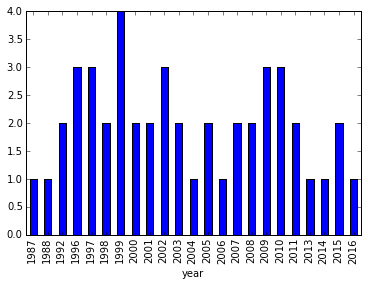

In [31]:
c4.groupby(['year']).size().plot(kind='bar')

In [35]:
# max value of George Clooney's n number for each year
# can also use .min() .mean() .size()
c4.groupby(['year']).n.max().head(3)

year
1987    15
1988     2
1992    23
Name: n, dtype: float64

In [37]:
# max value of George Clooney's n number for each decade
c4.groupby(c4.year // 10 * 10).n.size().head(3)

year
1980     2
1990    14
2000    20
dtype: int64

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

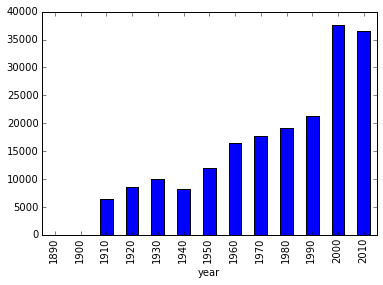

In [153]:
# limit to year 2015 and lower
titles[titles.year < 2015].groupby(titles.year // 10 * 10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

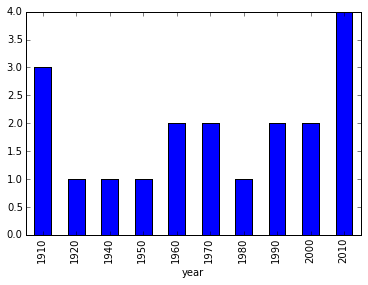

In [154]:
titles[titles.title == "Hamlet"].groupby(titles.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [57]:
cast.head(3)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27


In [61]:
cast[(cast.n == 1) & (cast.year >= 1950) & (cast.year < 1960)].groupby([cast.year,cast.type]).size()

year  type   
1950  actor      605
      actress    267
1951  actor      630
      actress    272
1952  actor      588
      actress    284
1953  actor      632
      actress    287
1954  actor      622
      actress    298
1955  actor      605
      actress    264
1956  actor      609
      actress    286
1957  actor      704
      actress    283
1958  actor      691
      actress    275
1959  actor      672
      actress    285
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [156]:
cast[(cast.n <= 5) & (cast.year >= 1950) & (cast.year < 1960)].groupby([cast.year,cast.type,cast.n]).size()

year  type     n
1950  actor    1    605
               2    417
               3    488
               4    519
               5    551
      actress  1    267
               2    400
               3    304
               4    260
               5    214
1951  actor    1    630
               2    437
               3    546
               4    563
               5    565
      actress  1    272
               2    420
               3    284
               4    245
               5    247
1952  actor    1    588
               2    427
               3    522
               4    508
               5    535
      actress  1    284
               2    417
               3    291
               4    282
               5    222
                   ... 
1957  actor    1    704
               2    461
               3    583
               4    567
               5    562
      actress  1    283
               2    489
               3    316
               4    302
               5    273

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [69]:
cast.head(3)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27


In [157]:
cast[cast.title.str.contains("Pink Panther")].groupby(cast.year).size()

year
1963    19
1975    30
1976    73
1978    64
1982    40
1983    67
1993    46
2006    89
2009    82
dtype: int64

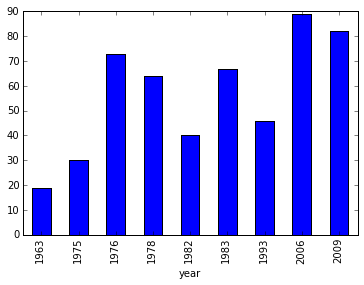

In [86]:
cast[cast.title.str.contains("Pink Panther")].groupby([cast.year]).size().plot(kind='bar')

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [87]:
cast.head(3)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27


In [146]:
s1 = cast[cast.name == "Frank Oz"].groupby([cast.year,cast.title]).size()
s1[s1 >= 2]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [159]:
s2 = cast[cast.name == "Frank Oz"].groupby([cast.character]).size()
s2[s2 >= 2].sort_values()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64